## Project 1 : Rain Prediction

In [1]:
# importing libraries
import pandas as pd
import numpy as np
  
# read the data in a pandas dataframe
data = pd.read_csv("austin_weather.csv")
  
# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis = 1)
  
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)
  
# save the data in a csv file
data.to_csv('austin_final.csv')

The precipitation in inches for the input is: [[1.33868402]]
the precipitation trend graph: 


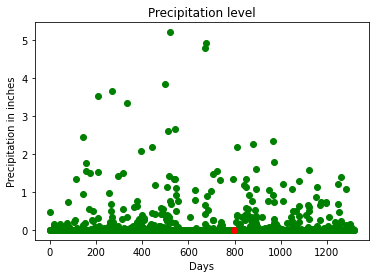

Precipitation vs selected attributes graph: 


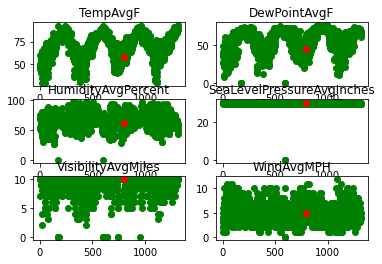

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
  
# read the cleaned data
data = pd.read_csv("austin_final.csv")
  
# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column 
# will serve as the label 
X = data.drop(['PrecipitationSumInches'], axis = 1)
  
# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)
  
# consider a random day in the dataset
# we shall plot a graph and observe this
# day
day_index = 798
days = [i for i in range(Y.size)]
  
# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our 
# input data.
clf.fit(X, Y)
  
# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)
  
# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))
  
# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
  
  
plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)
  
# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends
  
print("Precipitation vs selected attributes graph: ")
  
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
                                               color = 'g')
  
    plt.scatter(days[day_index], 
                x_vis[x_vis.columns.values[i]][day_index],
                color ='r')
  
    plt.title(x_vis.columns.values[i])
  
plt.show()

## Project 2 : Credit Card Fraud Detection

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [5]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file

# *** To Do ***
# Download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv"


data = pd.read_csv("creditcard.csv")
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271

In [6]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

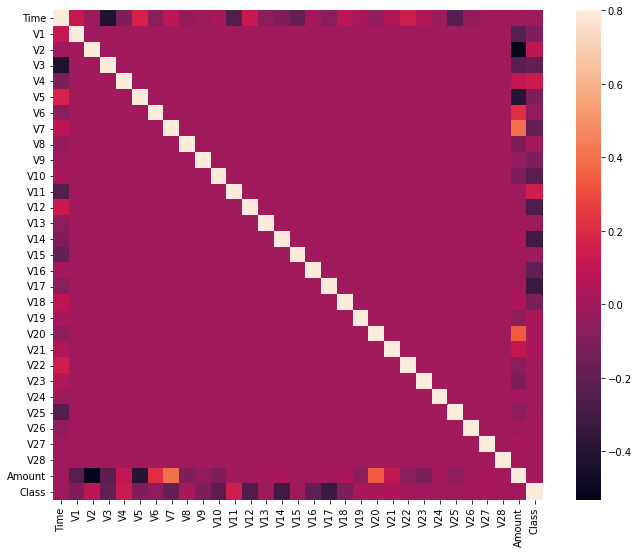

In [11]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [13]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [14]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [15]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
 
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
 
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995611109160493
The precision is 0.9620253164556962
The recall is 0.7755102040816326
The F1-Score is 0.8587570621468926
The Matthews correlation coefficient is0.8635448920046104


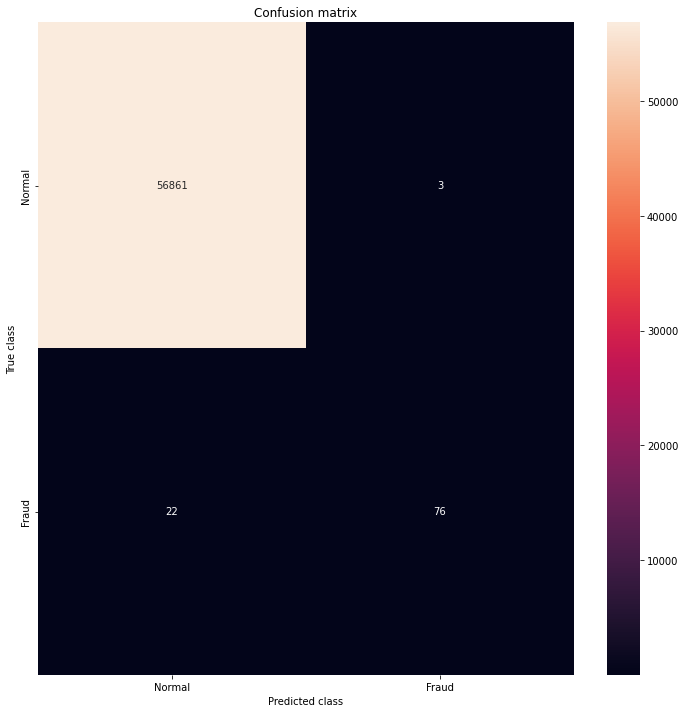

In [16]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Project 3 : Breast Cancer Detection

In [17]:
# performing linear algebra
import numpy as np 
  
# data processing
import pandas as pd
  
# visualisation
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("cancer.csv")
  
print (data.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
data.drop(['Unnamed: 32', 'id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [21]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

In [22]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)
  
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
  
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


In [24]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

In [25]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [26]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    # x_train.shape[1]  is for scaling
    cost = (np.sum(loss)) / x_train.shape[1]      
  
    # backward propagation
    derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1] 
    derivative_bias = np.sum(
        y_head-y_train) / x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients

In [27]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
  
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
  
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))
  
    # update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [28]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
  
    # if z is bigger than 0.5, our prediction is sign one (y_head = 1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
  
    return Y_prediction

Cost after iteration  0:  nan
Cost after iteration  10:  nan
Cost after iteration  20:  nan
Cost after iteration  30:  nan
Cost after iteration  40:  nan
Cost after iteration  50:  nan
Cost after iteration  60:  nan
Cost after iteration  70:  nan
Cost after iteration  80:  nan
Cost after iteration  90:  nan


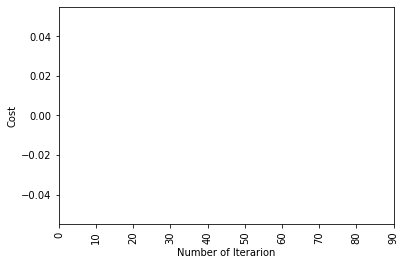

train accuracy: 37.267080745341616 %
test accuracy: 37.2093023255814 %


In [30]:
def logistic_regression(x_train, y_train, x_test, y_test, 
                        learning_rate,  num_iterations):
  
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
      
    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)
      
    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)
  
    # train / test Errors
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
      
logistic_regression(x_train, y_train, x_test, 
                    y_test, learning_rate = 1, num_iterations = 100)